## Support Vector Machine (SVM)

Firstly, let's run a machine learning algorithm to establish a baseline for comparison with other algorithms we will evaluate.

In [ ]:
!pip install librosa tensorflow matplotlib

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/My Drive/DeepLearning/code/dataset/"

X_train = np.load(data_path + 'X_train.npy')
X_val = np.load(data_path + 'X_val.npy')
X_test = np.load(data_path + 'X_test.npy')
y_train = np.load(data_path + 'y_train.npy')
y_val = np.load(data_path + 'y_val.npy')
y_test = np.load(data_path + 'y_test.npy')

In [ ]:
print("Shapes before reshaping:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

# Flatten the data to 2D if needed (assuming X_train, X_val, X_test are 3D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Ensure labels are 1D
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train = np.argmax(y_train, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)
if len(y_val.shape) > 1 and y_val.shape[1] > 1:
    y_val = np.argmax(y_val, axis=1)

print('Flattened shapes:')
print(f"X_train shape: {X_train_flat.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test_flat.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val_flat.shape}")
print(f"y_val shape: {y_val.shape}")


Shapes before reshaping:
X_train shape: (2794, 1001, 128)
y_train shape: (2794, 2)
X_test shape: (350, 1001, 128)
y_test shape: (350, 2)
X_val shape: (349, 1001, 128)
y_val shape: (349, 2)
Flattened shapes:
X_train shape: (2794, 128128)
y_train shape: (2794,)
X_test shape: (350, 128128)
y_test shape: (350,)
X_val shape: (349, 128128)
y_val shape: (349,)


In [ ]:
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train_flat)

# Transform training and testing data
X_train_scaled = scaler.transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Initialize SVM classifier (adjust parameters as needed)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM classifier
svm.fit(X_train_flat, y_train)

# Predict on validation set
y_val_pred = svm.predict(X_val_flat)

# Evaluate performance on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average='weighted')  # Use weighted average for imbalanced datasets
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation F1 Score: {val_f1:.4f}')

# Predict on test set
y_test_pred = svm.predict(X_test_flat)

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Use weighted average for imbalanced datasets
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

# Print classification report for test set
print('Classification Report:')
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.7937
Validation F1 Score: 0.7733
Test Accuracy: 0.7943
Test F1 Score: 0.7634
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       252
           1       0.81      0.35      0.49        98

    accuracy                           0.79       350
   macro avg       0.80      0.66      0.68       350
weighted avg       0.80      0.79      0.76       350



F1 Score: 0.49
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       252
           1       0.81      0.35      0.49        98

    accuracy                           0.79       350
   macro avg       0.80      0.66      0.68       350
weighted avg       0.80      0.79      0.76       350

Accuracy: 79.43%


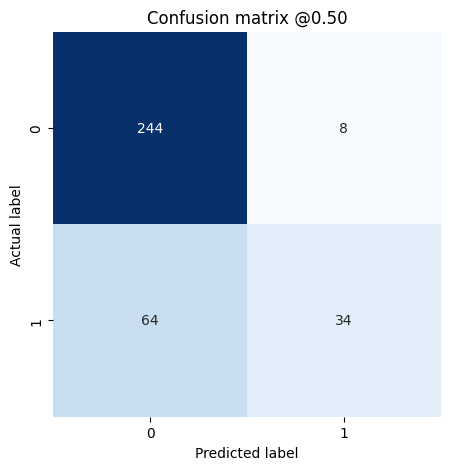

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print('F1 Score: {:.2f}'.format(f1))

# Print the classification report for detailed evaluation
print(classification_report(y_test, y_test_pred))

# Print the accuracy score for comparison
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: {:.2f}%'.format(100 * accuracy))

# Function to plot confusion matrix
def plot_cm(labels, y_test_pred, threshold=0.5):
    y_test_pred = y_test_pred > threshold
    cm = confusion_matrix(labels, y_test_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title('Confusion matrix @{:.2f}'.format(threshold))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Call the function to plot the confusion matrix
plot_cm(y_test, y_test_pred)


The initial SVM results on the imbalanced dataset provide a baseline for comparison with deep learning models. The accuracy is 79.43%, but this high value is misleading due to the class imbalance. The overall F1 score is 0.49, indicating the model struggles with precision and recall, especially for the minority class (screaming). For non-screaming audio, the model performs well with an F1 score of 0.87, but for screaming audio, the F1 score drops to 0.49 due to low recall (0.35). It is important to mention that in our Human Scream Detection project, specifically for surveillance, the number of False Positives (FP) plays a crucial role. A False Positive means that the recorded audio contains a scream, but the algorithm fails to recognize it. In real life, this would be a significant error, indicating that the system is not functioning effectively. These results highlight the need for data augmentation and advanced models to better detect screaming samples and address class imbalance.